## MNIST Conv Net (keras implementation)


In [72]:
# Imports
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10) # Make the figures a bit bigger
import numpy as np

In [73]:
# Training parameters
batch_size = 128
num_classes = 10
epochs = 12

50000 train samples
10000 test samples


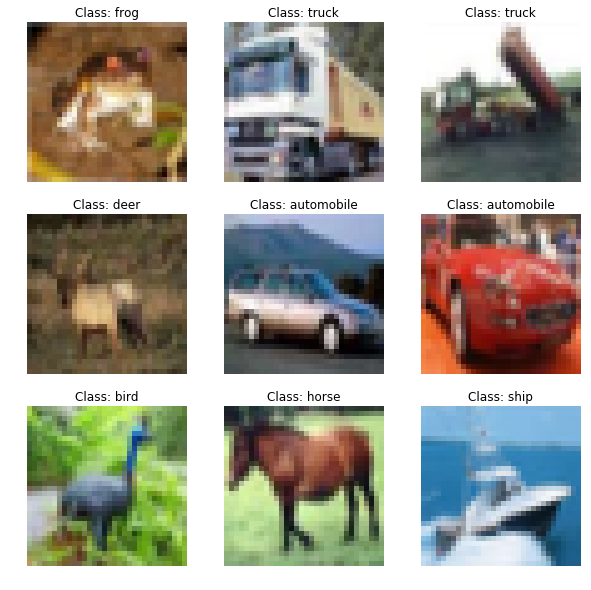

In [84]:
# Data preparation

# Input image dimensions
img_rows, img_cols = 32, 32
img_channels = 3

# The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_names[y_train[i][0]]))

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], img_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [75]:
# Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [76]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.val_loss = []
        self.acc = []
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))

lh = LossHistory()
# Training loop
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[lh])
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 22s 449us/step - loss: 1.9142 - acc: 0.3023 - val_loss: 1.6872 - val_acc: 0.4022
Epoch 2/12
50000/50000 [==============================] - 22s 438us/step - loss: 1.4876 - acc: 0.4599 - val_loss: 1.2688 - val_acc: 0.5427
Epoch 3/12
50000/50000 [==============================] - 22s 432us/step - loss: 1.2690 - acc: 0.5477 - val_loss: 1.1206 - val_acc: 0.6053
Epoch 4/12
50000/50000 [==============================] - 22s 433us/step - loss: 1.1179 - acc: 0.6042 - val_loss: 0.9992 - val_acc: 0.6460
Epoch 5/12
50000/50000 [==============================] - 22s 434us/step - loss: 1.0056 - acc: 0.6463 - val_loss: 0.9221 - val_acc: 0.6771
Epoch 6/12
50000/50000 [==============================] - 22s 434us/step - loss: 0.9153 - acc: 0.6808 - val_loss: 0.8316 - val_acc: 0.7100
Epoch 7/12
50000/50000 [==============================] - 22s 436us/step - loss: 0.8422 - acc: 0.7075 - val_loss: 0.

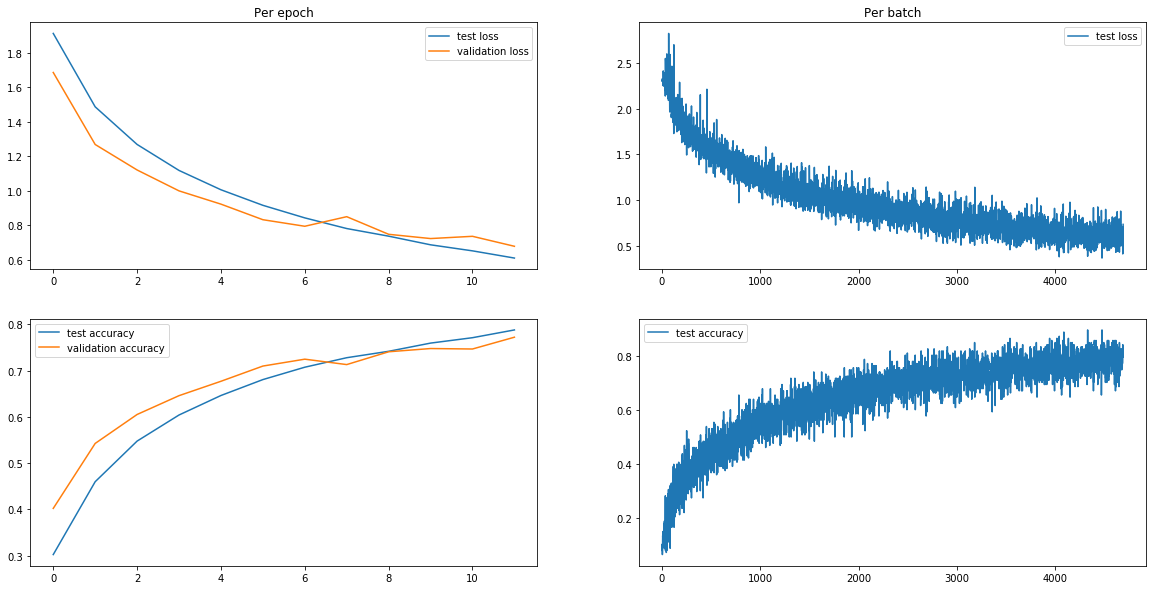

In [101]:
# Plot loss and accuracy
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Per epoch")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['test loss', 'validation loss'])
plt.subplot(2, 2, 2)
plt.title("Per batch")
plt.plot(lh.loss)
plt.legend(['test loss', 'validation loss'])
plt.subplot(2, 2, 3)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["test accuracy", "validation accuracy"])
plt.subplot(2, 2, 4)
plt.plot(lh.acc)
plt.legend(["test accuracy", "validation accuracy"])

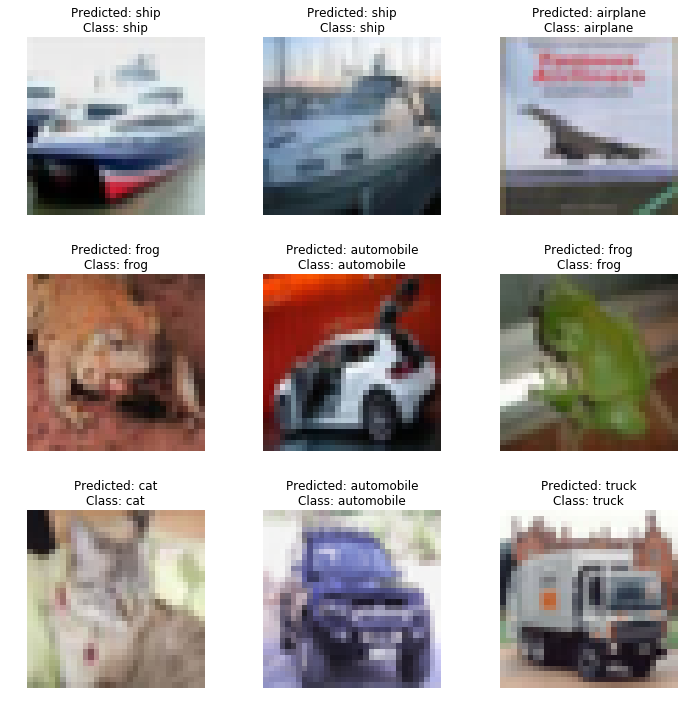

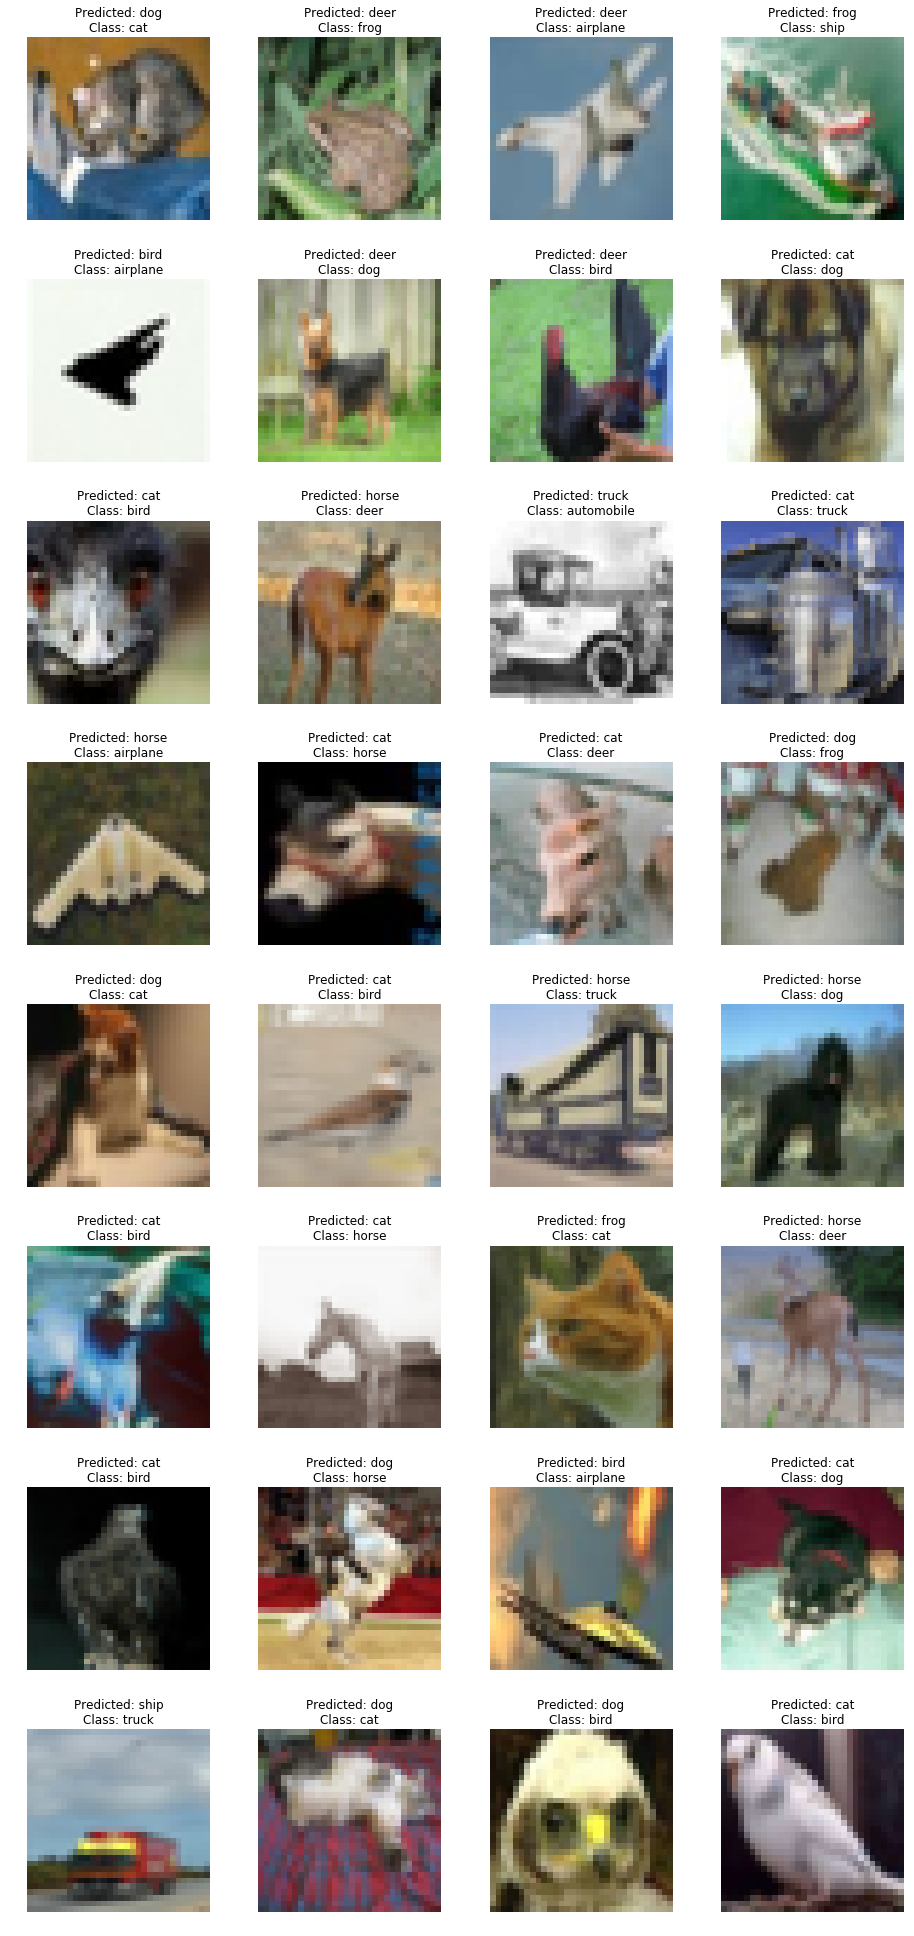

In [87]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
y_test_r = np.argmax(y_test, axis=-1)
correct_indices = np.nonzero(predicted_classes == y_test_r)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_r)[0]

# Examples of correct predictions
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nClass: {}".format(class_names[predicted_classes[correct]], class_names[y_test_r[correct]]))
plt.tight_layout()

# Examples of incorrect predictions
plt.figure(figsize=(13, 27))
for i, incorrect in enumerate(incorrect_indices[:32]):
    plt.subplot(8, 4, i + 1)
    plt.axis('off')
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nClass: {}".format(class_names[predicted_classes[incorrect]], class_names[y_test_r[incorrect]]))
plt.tight_layout()

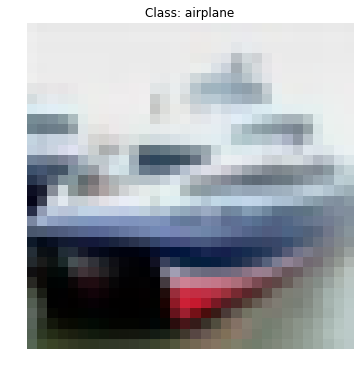

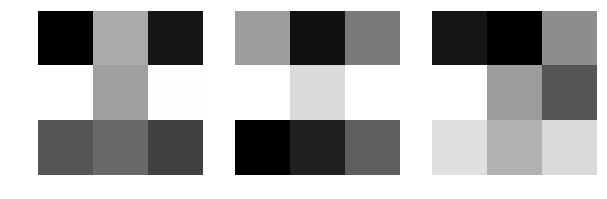

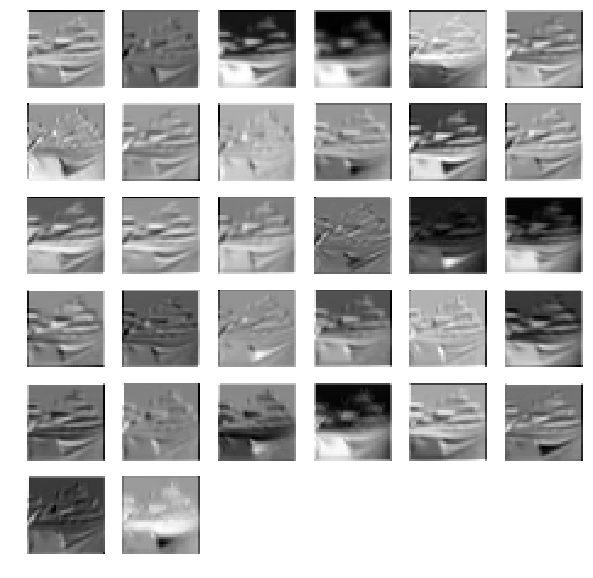

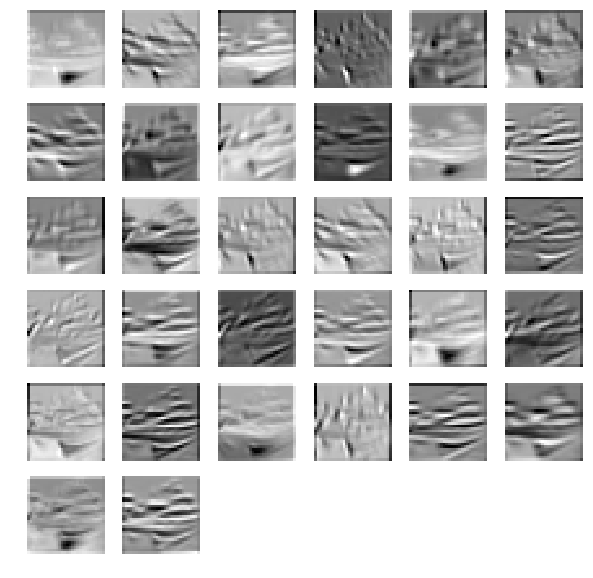

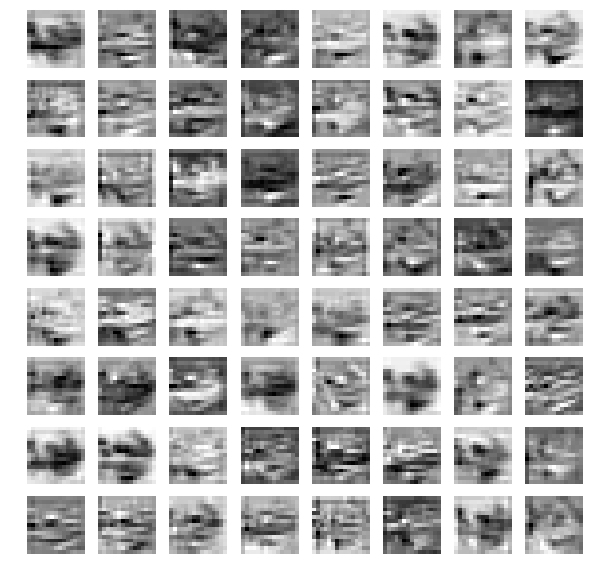

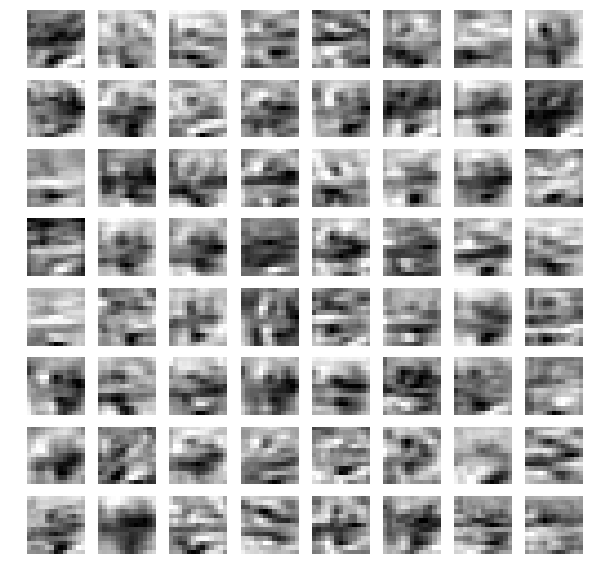

In [79]:
# Take an example image
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(x_test[1], cmap='gray', interpolation='none')
plt.title("Class: {}".format(class_names[np.argmax(y_test[1])]))

# First filter of first conv layer (3x3x3)
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow(model.layers[0].get_weights()[0].transpose(3, 0, 1, 2)[0][i], cmap='gray', interpolation='none')

# Inspect intermediate layer output
from keras import backend as K

# Activation maps of first conv layer
c0_output = K.function([model.layers[0].input], [model.layers[0].output])
c0_result = c0_output([x_test[None, 1]])[0][0].transpose(2, 0, 1)
plt.figure()
for i in range(c0_result.shape[0]):
  plt.subplot(6, 6, i + 1)
  plt.axis('off')
  plt.imshow(c0_result[i], interpolation='none', cmap='gray')

# Activation maps of second conv layer
c2_output = K.function([model.layers[0].input], [model.layers[2].output])
c2_result = c2_output([x_test[None, 1]])[0][0].transpose(2, 0, 1)
plt.figure()
for i in range(c2_result.shape[0]):
  plt.subplot(6, 6, i + 1)
  plt.axis('off')
  plt.imshow(c2_result[i], interpolation='none', cmap='gray')
  
# Activation maps of third conv layer
c6_output = K.function([model.layers[0].input], [model.layers[6].output])
c6_result = c6_output([x_test[None, 1]])[0][0].transpose(2, 0, 1)
plt.figure()
for i in range(c6_result.shape[0]):
  plt.subplot(8, 8, i + 1)
  plt.axis('off')
  plt.imshow(c6_result[i], interpolation='none', cmap='gray')
  
# Activation maps of fourth conv layer
c8_output = K.function([model.layers[0].input], [model.layers[8].output])
c8_result = c8_output([x_test[None, 1]])[0][0].transpose(2, 0, 1)
plt.figure()
for i in range(c8_result.shape[0]):
  plt.subplot(8, 8, i + 1)
  plt.axis('off')
  plt.imshow(c8_result[i], interpolation='none', cmap='gray')